<a href="https://colab.research.google.com/github/johyunkang/python_stat/blob/main/stat_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pulp==2.5.0

### 27회. 지하철 호선과 월별 승객 수 간 상관관계가 있는지 확인 (Type3 ANOVA 상요)


- 1. 귀무가설과 대립가설을 설정하라

In [ ]:
print('''
1. 상호작용효과 검정에 대한 가설
- 귀무가설(H0): 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설(H1): 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

2. 주효과 검정에 대한 가설(2개)
 - 귀무가설(H0): 지하철 호선과 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 자하철 호선과 승객 수 차이는 존재한다.
 
 - 귀무가설(H0): 월별 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 월별 승객 수 차이는 존재한다.
''')


1. 상호작용효과 검정에 대한 가설
- 귀무가설(H0): 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설(H1): 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

2. 주효과 검정에 대한 가설(2개)
 - 귀무가설(H0): 지하철 호선과 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 자하철 호선과 승객 수 차이는 존재한다.
 
 - 귀무가설(H0): 월별 승객 수 차이는 존재하지 않는다.
 - 대립가설(H1): 월별 승객 수 차이는 존재한다.



- 2. 통계량을 구하고, 대립가설 채택 여부를 기술하라

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd
import numpy as np

DATA_URL = 'https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/'
df = pd.read_csv(DATA_URL+'27_problem9.csv')
df

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301
...,...,...,...
67,3,8,1365
68,3,9,1374
69,3,10,1337
70,3,11,1332


In [ ]:
formula = 'total ~ C(line)*C(month)'
model = ols(formula, data=df).fit()
aov_table = anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,3.466344e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


In [ ]:
print('''
유의수준 0.1 하에서
 - 상호작용효과 검정에 대한 가설은 p-value가 0.1 보다 작기에
   귀무가설을 기각한다. 즉 지하철 호선과 월별, 승객 수 간 상관관계
   가 있다.
   
 - 주효과 검정에 대한 가설 2개는 모두 p-value가 유의수준 0.1 보다
   작기에 귀무가설을 기각한다. 즉, 지하철 호선과 승객 수 차이는
   존재하며, 월별승객 수 차이 또한 존재한다.
   
교호작용을 먼저 검정하는 Type3 ANOVA의 경우 아래 시각화 자료를
통해 상관관계를 한눈에 알 수 있다.
''')


유의수준 0.1 하에서
 - 상호작용효과 검정에 대한 가설은 p-value가 0.1 보다 작기에
   귀무가설을 기각한다. 즉 지하철 호선과 월별, 승객 수 간 상관관계
   가 있다.
   
 - 주효과 검정에 대한 가설 2개는 모두 p-value가 유의수준 0.1 보다
   작기에 귀무가설을 기각한다. 즉, 지하철 호선과 승객 수 차이는
   존재하며, 월별승객 수 차이 또한 존재한다.
   
교호작용을 먼저 검정하는 Type3 ANOVA의 경우 아래 시각화 자료를
통해 상관관계를 한눈에 알 수 있다.



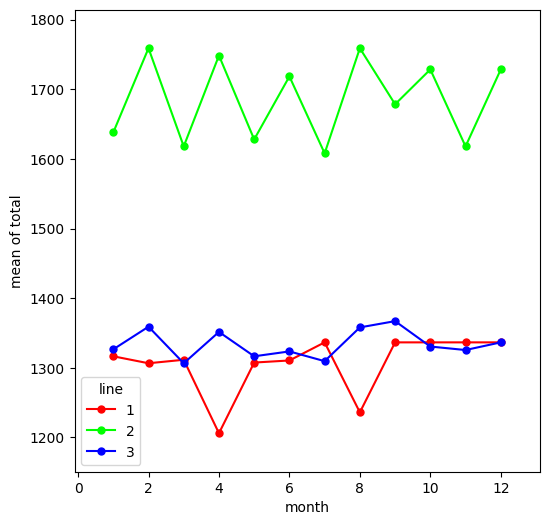

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

total = df['total']
line = df['line']
month = df['month']

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(month, line, total, ms=10, ax=ax)

In [ ]:
print('''
인터랙션 그래프를 보았을 때, month와 line에 따라 승객수의 그래프가
교차하는 지점이 없이 평행해야지 인터랙션이 없다고 할 수 있지만,
해당 그래프에서는 여러 번 교차하므로, 월별 호선이 승객 수에 서로
영향을 준다고 할 수 있다.
즉, 상관관계가 존재한다고 할 수 있다.
''')


인터랙션 그래프를 보았을 때, month와 line에 따라 승객수의 그래프가
교차하는 지점이 없이 평행해야지 인터랙션이 없다고 할 수 있지만,
해당 그래프에서는 여러 번 교차하므로, 월별 호선이 승객 수에 서로
영향을 준다고 할 수 있다.
즉, 상관관계가 존재한다고 할 수 있다.



### 26회. 아래 그래프는 1월부터 9월까지의 은의 가격이다.

- 1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [ ]:
df_silver = pd.DataFrame({'1월':[12.14], '2월':[42.6], '3월':[34.4], '4월':[35.29], 
                         '5월':[30.96], '6월':[57.12], '7월':[37.84], '8월':[42.49], 
                         '9월':[31.38]})
df_silver.index=['value']
df_silver

,1월,2월,3월,4월,5월,6월,7월,8월,9월
value,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [ ]:
df_t = df_silver.T
df_t

,value
1월,12.14
2월,42.60
3월,34.40
4월,35.29
5월,30.96
6월,57.12
7월,37.84
8월,42.49
9월,31.38


In [ ]:
df_t['3m'] = df_t.rolling(3).mean()
df_t['3m'] = df_t['3m'].fillna(0)
df_t

,value,3m
1월,12.14,0.000000
2월,42.60,0.000000
3월,34.40,29.713333
4월,35.29,37.430000
5월,30.96,33.550000
6월,57.12,41.123333
7월,37.84,41.973333
8월,42.49,45.816667
9월,31.38,37.236667


In [ ]:
# 폰트 적용 (Windows)
import matplotlib
import matplotlib.font_manager as fm

# # fm.get_fontconfig_fonts()
# font_location='/System/Library/Fonts/Supplemental/AppleMyungjo.ttf'
# font_name=fm.FontProperties(fname=font_location).get_name()
# print(font_name)
# matplotlib.rc('font', family=font_name)

AppleMyungjo


In [ ]:
# 폰트 찾기
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

for i, fon in enumerate(font_list):
    # 명조체 찾기
    if 'myun' in fon.lower():
        print(fon)

['AppleMyungjo']


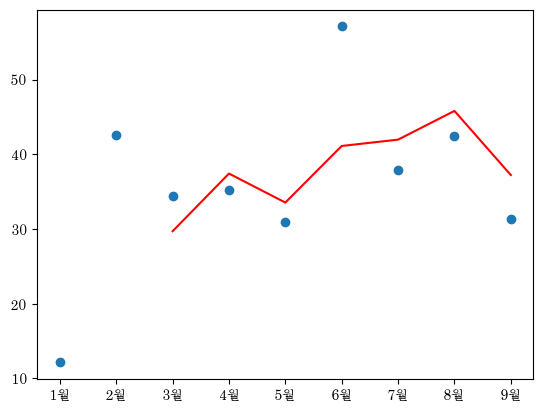

In [ ]:
# 폰트 적용 (mac os)
import matplotlib.pyplot as plt
plt.rc('font', family='AppleMyungjo')

print(plt.rcParams['font.family'])
# plt.plot(df_t['value'])
plt.scatter(df_t['value'].index, df_t['value'])
plt.plot(df_t['3m'][2:], c='red')
plt.show()

- 2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두 번째 자리에서 반올림

In [ ]:
import numpy as np
m1 = df_t.loc['1월', 'value']
m9 = df_t.loc['9월', 'value']
rt = (m9/m1) -1
print(f'1월:{m1}, 9월:{m9}')
print(f'1월 대비 9월 은의 가격은 {round(rt*100, 2)} % 상승하였다.')

1월:12.14, 9월:31.38
1월 대비 9월 은의 가격은 158.48 % 상승하였다.


### 25회.

1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고 NPV(순현재가치)가 가장 높아지는 안을 제시하시오

In [ ]:
# 문제 주어진 데이터
import pandas as pd
df_npv = pd.DataFrame({'1y':[10, 15, 12, 13, 16],
                      '2y':[20, 14, 11, 25, 30],
                      '3y':[15, 19, 30, 20, 24]})
df_npv.index=['1안', '2안', '3안', '4안', '5안']
df_npv

,1y,2y,3y
1안,10,20,15
2안,15,14,19
3안,12,11,30
4안,13,25,20
5안,16,30,24


In [ ]:
df_npv['total'] = df_npv.sum(axis=1)
df_npv

,1y,2y,3y,total
1안,10,20,15,45
2안,15,14,19,48
3안,12,11,30,53
4안,13,25,20,58
5안,16,30,24,70


In [ ]:
import pulp
import warnings
warnings.filterwarnings(action='ignore')

prob = pulp.LpProblem('Profit Max', pulp.LpMaximize)

a1 = pulp.LpVariable('a1', lowBound=0, upBound=1, cat='Integer')
a2 = pulp.LpVariable('a2', lowBound=0, upBound=1, cat='Integer')
a3 = pulp.LpVariable('a3', lowBound=0, upBound=1, cat='Integer')
a4 = pulp.LpVariable('a4', lowBound=0, upBound=1, cat='Integer')
a5 = pulp.LpVariable('a5', lowBound=0, upBound=1, cat='Integer')

# 목적함수 정의
prob += 45 * a1 + 48 * a2 + 53 * a3 + 58 *a4 + 70 * a5

# 부등식 (제약조건) 정의
prob += 10*a1 + 15*a2 + 12*a3 + 13*a4 + 16*a5 <= 50
prob += 20*a1 + 14*a2 + 11*a3 + 25*a4 + 30*a5 <= 60
prob += 15*a1 + 19*a2 + 30*a3 + 20*a4 + 24*a5 <= 70

# 문제풀기
prob.solve()

# 결과출력
print(f'''
Optimal Solution
a1 = {int(a1.value())}
a2 = {int(a2.value())}
a3 = {int(a3.value())}
a4 = {int(a4.value())}
a5 = {int(a5.value())}
Maximum profilt : {int(prob.objective.value())}
''')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/homebrew/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/r7/x_smy14j7xjfkgms9f93wp0r0000gn/T/b600aee4a94a4b9cb6cad29e15406ef4-pulp.mps max branch printingOptions all solution /var/folders/r7/x_smy14j7xjfkgms9f93wp0r0000gn/T/b600aee4a94a4b9cb6cad29e15406ef4-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 39 RHS
At line 43 BOUNDS
At line 49 ENDATA
Problem MODEL has 3 rows, 5 columns and 15 elements
Coin0008I MODEL read with 0 errors
Continuous objective value is 173.526 - 0.00 seconds
Cgl0004I processed model has 3 rows, 5 columns (5 integer (5 of which binary)) and 15 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 2 integers unsatisfied sum - 0.675472
Cbc0038I Pass   1: suminf.    0.10000 (1) obj. -165.7 iterations 1
Cbc0038I Solution found of -118
Cbc0038I Before mini branch 